In [1]:
import cv2
import glob
import os
from os import listdir
from os.path import isdir
import numpy as np
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from IPython.display import display
from skimage.metrics import structural_similarity
import seaborn as sns
import gc
from imagehash import dhash

In [2]:
def list_files_with_extension(directory, extension):
    return (f for f in listdir(directory) if f.endswith('.' + extension))

In [31]:
def compare_images(image_1, image_2, compare_function, downsample_size, convert_greyscale):
    if convert_greyscale:
        reduced_image_1 = cv2.resize(cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY), downsample_size)
        reduced_image_2 = cv2.resize(cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY), downsample_size)
    else:
        reduced_image_1 = cv2.resize(image_1, downsample_size)
        reduced_image_2 = cv2.resize(image_2, downsample_size)
    
    return compare_function(reduced_image_1, reduced_image_2)

In [32]:
# Change this to suit your environment
base_path = "/notebooks/storage/forestfire/data"
input_path = base_path + "/videos/"
output_image_path = base_path + "/videos/frame_extracts/"

In [33]:
# if isdir(input_path) == False:
#     !mkdir $input_path
# if isdir(output_image_path) == False:
#     !mkdir $output_image_path
# !cd {input_path} \
#     && curl -O "https://sintecsys-omdena.s3.amazonaws.com/videos.zip"

In [34]:
# !cd {input_path} && sudo unzip -o -q 'videos.zip' && sudo chmod -R u+rw  ./ && sudo mv -f ./videos/*.mp4 ./ && sudo rm -Rf ./videos ./__*

In [50]:
# Create a dataframe containing the image paths and classification
image_paths = glob.glob(os.path.join(base_path + "/TTG TUR/","*.jpeg"))
data = []
for image_path in image_paths:
    label_name = image_path.split('.jpeg')[0][-3:]
    image_path=image_path
    label = -1
    if label_name == 'SIM':
        label = 1
    elif label_name == 'NAO':
        label = 0
    data.append((image_path, label))
    
image_df = pd.DataFrame(data, columns=["image_path", "label"])
image_df["label"] = image_df["label"].astype(str)

image_df = image_df.sort_values(["image_path"]).reset_index().drop(["index"], axis=1)

image_df.head(5)

,image_path,label
0,/notebooks/storage/forestfire/data/TTG TUR/201...,1
1,/notebooks/storage/forestfire/data/TTG TUR/201...,0
2,/notebooks/storage/forestfire/data/TTG TUR/201...,1
3,/notebooks/storage/forestfire/data/TTG TUR/201...,1
4,/notebooks/storage/forestfire/data/TTG TUR/201...,0


In [51]:
def hash_similarity(image_1, image_2):
    return -np.abs(dhash(Image.fromarray(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))) - dhash(Image.fromarray(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))))

In [52]:
image_paths = image_df["image_path"].tolist()

In [53]:
def function_2(image_paths, similarity_function, threshold, convert_greyscale):
    t_paths = image_paths
    ret_paths = t_paths
    for idx_1, path_1 in enumerate(t_paths):
        for idx_2, path_2 in enumerate(t_paths):
            if (path_1 not in ret_paths) or (path_2 not in ret_paths) or path_2 <= path_1:
                continue
            else:
                image_1 = cv2.imread(path_1)
                image_2 = cv2.imread(path_2)
                score = compare_images(image_1, image_2, similarity_function, (int(1080 / 4), int(1920 / 4)), convert_greyscale)
                if score > threshold:
                    ret_paths.remove(path_2)
                    print("Found duplicate images - score=", score)
                    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
                    plt.show()
                    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
                    plt.show()
    return t_paths

In [54]:
# remaining = function_2(image_paths, structural_similarity)

Found duplicate images - score= -7


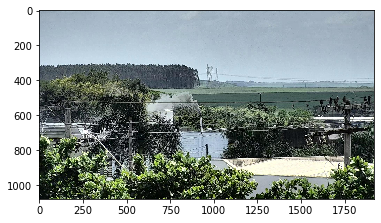

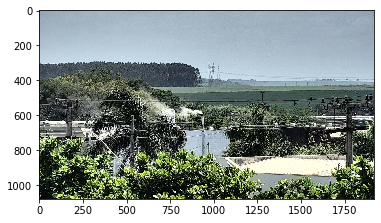

Found duplicate images - score= -7


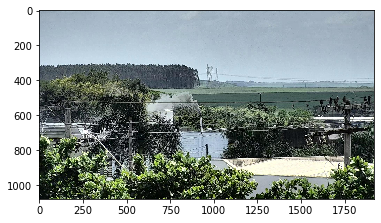

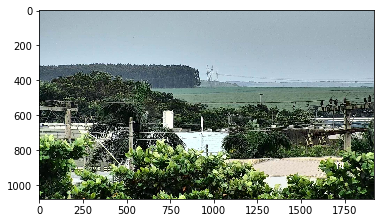

Found duplicate images - score= -5


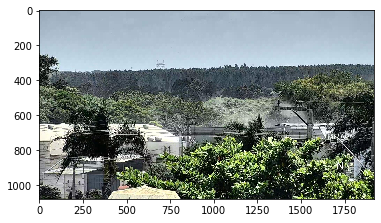

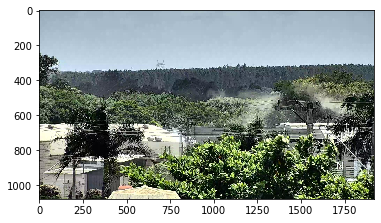

KeyboardInterrupt: 

In [55]:
remaining = function_2(image_paths, hash_similarity, -8, True)

In [ ]:
print(len())
print(len(remaining))
# for i in remaining:
#     plt.imshow(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB))
#     plt.show()

In [ ]:
print(remaining)